# Exploring the contents of the Hoffman data
### Initial testing of data, January 2023

### Imports

In [35]:
import pydicom as dcm
import os
import nibabel as nib
import numpy as np
from glob import glob
from tqdm import tqdm, tqdm_notebook
import dcmstack
import sys
sys.path.append("../")
from IPython.display import clear_output
import pandas as pd
import shutil
import matplotlib.pyplot as plt
# suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [36]:
# Create a list of all the centre directories (centre_dirs) in the folder with images
# These are subdirs of the main folder here that begin with "_"
# centre_dirs = glob("D:\\Hoffman\\_*\\")

### The below code was used to create a list of all of the DICOM image folder paths
Now invalid, saved to image_dirs.txt

In [37]:
# # The below was used to create the list of directories that contain dicom images
# # Create a list of all the image_dirs in the centre_dirs
# # These are subdirs of each centre_dir that contains dicom images
# # Loop over centre_dirs and append the path of any recursive subdir that contains dicom objects
# # to image_dirs
# image_dirs = []
# for centre in centre_dirs:
#     # recursively list all lowest-level dirs in centre
#     image_dirs += glob(centre + "**\\", recursive=True)
    
# # Convert all paths in image_dirs to linux format
# image_dirs = [path.replace("\\", "/") for path in image_dirs]

# # Remove all dirs from image_dirs that are parent folders of other folders in image_dirs
# for dir in tqdm_notebook(image_dirs,desc="Removing parent dirs"):
#     for other_dir in image_dirs:
#         if dir in other_dir and dir != other_dir:
#             # print("Removing " + dir)
#             image_dirs.remove(dir)
#             break
        
# # Write a function to test if a folder contains dicom objects
# # Returns True if all files in the folder are dicom objects, False otherwise
# def test_folder_for_dicoms(folder):
#     raiseFlag = True
#     for file in os.listdir(folder):
#         try:
#             dcm.dcmread(folder + file)
#         except:
#             raiseFlag = False
#     return raiseFlag
    
        
# # For a second pass, remove all dirs from image_dirs that fail the test_folder_for_dicoms test
# # Use tqdm_notebook to show progress
# for dir in tqdm_notebook(image_dirs,desc="Removing dirs that don't contain dicoms"):
#     # print("Testing " + dir + "\r")
#     if not test_folder_for_dicoms(dir):
#         image_dirs.remove(dir)    
        
# # See how many files are in each dir in image_dirs, and if there are <10 then remove the dir
# for dir in tqdm_notebook(image_dirs,desc="Removing dirs with <10 files"):
#     if len(os.listdir(dir)) <= 10:
#         image_dirs.remove(dir)
        
        
# print("Saving image_dirs to text file")
# # Write out the image_dirs to a text file
# with open("image_dirs.txt", "w") as f:
#     for dir in image_dirs:
#         f.write(dir + "\n")


### Open up the image directories...

In [38]:
# Read in the image_dirs from the text file
# image_dirs = []
# with open("image_dirs.txt", "r") as f:
#     for line in f:
#         image_dirs.append(line.strip())

In [39]:
# for im in image_dirs:
#     if len(os.listdir(im))  < 1:
#         image_dirs.remove(im)
# print("There are " + str(len(image_dirs)) + " valid image directories")

In [40]:
# dcm.dcmread("D:/Hoffman/_Belfast/Local/Brain Standard 1.25mm/1144")

### The below code was used to convert all of the DICOM images to NII files
Now invalid, all images converted and saved to NII (then converted to Analyze)

In [41]:
# # Loop over all of the image files in image_dirs and convert them to nifti 
# # each should have a filename consisting of "D:/Hoffman/NiftiImages/CENTRENAME_IMAGENUM.nii.gz" where 
# # CENTRENAME is the name of the centre, and IMAGENUM is a unique identifier for the image 
# # CENTRENAME can be found from the initial path which should start D:/Hoffman/_CENTRENAME/
# # the number of files in that centrename can be found from the REFFILE (D:/Hoffman/GN/images_dirs.txt)
# # find the index of the image dir in the REFFILE, and add 1 to get the IMAGENUM
# REFFILE = "D:/Hoffman/GN/image_dirs.txt"

# image_dirs = [path.replace("\\", "/").strip() for path in [line for line in open(REFFILE)]]

# # in outfile, write a comma-separated reference with the infile and outfile names
# OUTFILE = "D:/Hoffman/NiftiImages/ref.csv"

# i=1
# for dcm_img in image_dirs:
#     clear_output(wait=True)
#     sys.stdout.write("Converting " + dcm_img + " to nifti...  (" + str(i) + "/" + str(len(image_dirs)) + ")\r" )

#     # create an outfilename for the nifti image
#     # file will be saved in D:/Hoffman/NiftiImages/ with a converted name 
#     centrename = dcm_img.split("/")[2]
#     # remove the leading underscore from the centrename
#     centrename = centrename[1:]
#     # get the number of files in the centrename
#     N_centre = len([line for line in open(REFFILE) if centrename in line])
#     # find IMAGENUM by finding the index of the image dir in the REFFILE, and adding 1
#     imagenum = [line.strip() for line in open(REFFILE) if centrename in line].index(dcm_img) + 1
#     # make sure imagenum is double digits by adding a leading 0 if necessary
#     imagenum = str(imagenum).zfill(2)
#     # create the outfilename
#     outname = "D:/Hoffman/NiftiImages/" + centrename + "_" + imagenum + ".nii.gz"
    
#     # Keep a reference of the input and output filenames in OUTFILE for later use
#     with open(OUTFILE, "a") as f:
#         f.write(dcm_img + "," + outname + "\n")
    
#     try:            
#         # use dcmstack to convert the dicom image to nifti
#         # dcm_img is a folder so the stack will be created from all dicom objects in the folder
#         stack = dcmstack.DicomStack()
#         for file in os.listdir(dcm_img):
#             stack.add_dcm(dcm.dcmread(os.path.join(dcm_img + file)))
#         stack.to_nifti().to_filename(outname)
        
#     except:
#         pass
        
#     i+=1
    
    

### The below code was used to find all images that couldn't be converted
Now invalid


In [42]:
# Create a list of the dicoms that were not converted to nifti
# Do this by opening D:/Hoffman/NiftiImages/ref.csv and reading in as csv
# Then search by the second column (the outname) for any files that don't exist
# with open("MISSING_IMGS_rd2.txt", "w") as f:
#     for line in open("D:/Hoffman/NiftiImages/ref.csv"):
#         if not os.path.exists("D:/{}".format(line.split("D:/")[2].strip())):
#             f.write(line)
            
            # print("D:/{}".format(line.split("D:/")[1] + "\n"))

In [43]:
# Go through the list of MISSING_IMGS.txt and see if any of these folders are empty
# for line in open("MISSING_IMGS.txt"):
#     if len(os.listdir(os.path.join("D:/",line.split("D:/")[1][:-1]))) == 0:
#         print(line)

### The below code collected all of the DICOM header information into one dataframe
Now invalid, saved to dicom_headers.csv

In [44]:
# Collect all of the DICOM header data from the images in image_dirs.txt
# Put the data into a pandas dataframe where the columns are the DICOM tags
# and the rows are the images
# Find the unique values for each column and put them into a dictionary
# If there's a new DICOM tag in an image, add it to the dictionary and all previous entries as NaN

# # create an empty dataframe
# dcm_hdr_df = pd.DataFrame()

# for dcm_img in open("D:/Hoffman/GN/image_dirs.txt"):
    
#     # RoyalSurrey files aren't working for some reason - 10th Jan 2023 12:10 GN
#     if "RoyalSurrey" in dcm_img:
#         continue
    
#     dcm_img = dcm_img.strip()
    
#     files = os.listdir(dcm_img)
#     dcm_path = os.path.join(dcm_img, files[0])
#     dcm_file = dcm.dcmread(dcm_path)
    
#     # create a dictionary of the dicom header data
#     # the keys are the dicom tags, and the values are the values of the tags
#     temp_dict = {}
    
#     # add a column for the image directory
#     temp_dict["image_dir"] = dcm_img
    
#     for elem in dcm_file.iterall():
#         # check if the elem tag is (7fe0, 0010) (the pixel data) and skip it
#         if elem.tag == "(0x7fe0, 0x0010)":
#             continue 
        
#         temp_dict[elem.tag] = elem.value
        
#     # add the dictionary to the dataframe
#     dcm_hdr_df = dcm_hdr_df.append(temp_dict, ignore_index=True)
    
#     print("Finished " + dcm_img + "\r", end="")
    
# # save the dataframe to a csv file
# dcm_hdr_df.to_csv("D:/Hoffman/GN/DICOM_header_info.csv")

### The below code was used to create an ImageJ macro for converting the NII files to Analyze
Now invalid, saved to macro_analyze.txt

In [45]:
# # Analyze Conversion
# text = """open("D:/Hoffman/NiftiImages/{0}.nii");
# run("Analyze... ", "save=D:/Hoffman/AnalyzeImages/{0}.img");
# close();
# """
# with open("macro_analyze.txt","w") as f:
#     for nii in [o for o in os.listdir("D:/Hoffman/NiftiImages") if "nii" in o ]:
#         f.write(text.format(nii.split(".")[0]))

### The below code loads the file "DICOM_TagLibrary.txt" into a dictionary for use in proceeding code

In [46]:
dcm_labels = pd.read_csv("D:/Hoffman/GN/Reference-Manuals/DICOM_TagLibrary_wGE.txt", sep="\t")
dcm_labels.drop(columns=["VR"], inplace=True)
dcm_labels.set_index("Tag", inplace=True)
dcm_labels=dcm_labels.to_dict("index")
for key,val in dcm_labels.items():
    dcm_labels[key] = val["Name"]
dcm_labels

{'(0002,0000)': 'File Meta Information Group Length',
 '(0002,0001)': 'File Meta Information Version',
 '(0002,0002)': 'Media Storage SOP Class UID',
 '(0002,0003)': 'Media Storage SOP Instance UID',
 '(0002,0010)': 'Transfer Syntax UID',
 '(0002,0012)': 'Implementation Class UID',
 '(0002,0013)': 'Implementation Version Name',
 '(0002,0016)': 'Source Application Entity Title',
 '(0002,0017)': 'Sending Application Entity Title',
 '(0002,0018)': 'Receiving Application Entity Title',
 '(0002,0100)': 'Private Information Creator UID',
 '(0002,0102)': 'Private Information',
 '(0004,1130)': 'File-set ID',
 '(0004,1141)': 'File-set Descriptor File ID',
 '(0004,1142)': 'Specific Character Set of File-set Descriptor File',
 '(0004,1200)': 'Offset of the First Directory Record of the Root Directory Entity',
 '(0004,1202)': 'Offset of the Last Directory Record of the Root Directory Entity',
 '(0004,1212)': 'File-set Consistency Flag',
 '(0004,1220)': 'Directory Record Sequence',
 '(0004,1400)': 

In [47]:
# Inspect the DICOM header data
# Load up the DICOM header data from the csv file in pandas
dcm_hdr_df = pd.read_csv("D:/Hoffman/MISC/DICOM_header_info.csv", index_col=0)

# dcm_hdr_df.head()

dcm_hdr_df["Centre"] = dcm_hdr_df["image_dir"].apply(lambda x: x.split("/")[2][1:])

dcm_hdr_df.head()

,image_dir,"(0008, 0000)","(0008, 0005)","(0008, 0008)","(0008, 0012)","(0008, 0013)","(0008, 0014)","(0008, 0016)","(0008, 0018)","(0008, 0020)",...,"(7053, 1016)","(7053, 1017)","(7053, 1018)","(7053, 10c2)","(0028, 0109)","(0029, 1031)","(0029, 1032)","(0029, 1033)","(0029, 1034)",Centre
0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,105619.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443002179.387491,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen
1,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,110015.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443002415.665463,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen
2,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,110411.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443002651.551739,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen
3,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,110807.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443002887.829641,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen
4,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,111203.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443003123.940448,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen


### Now the aim is to attach the relevant "SeriesNum" from the Analyze conversion to the DICOM header information

In [48]:
dcm_an_ref = pd.read_csv("D:/Hoffman/GN/Data/ref.csv",sep=",D:",names=["DCM","NII"])
dcm_an_ref["Centre"] = dcm_an_ref["NII"].apply(lambda x: x.split("/")[-1].split("_")[0])
dcm_an_ref["SeriesNum"] = dcm_an_ref["NII"].apply(lambda x: x.split("/")[-1].split("_")[1].strip(".nii.gz"))
dcm_an_ref.drop("NII",axis=1,inplace=True)
dcm_an_ref.head()

,DCM,Centre,SeriesNum
0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,01
1,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,02
2,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,03
3,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,04
4,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,05


In [49]:
# iterate over dcm_hdr_df using iterrows and add columns for the centre and series number
# deduced from dcm_an_ref by matching the image_dir to the DCM column 

centrelist = []
serieslist = []
for index,row in dcm_hdr_df.iterrows():
    dcm_dir = row["image_dir"]
    if "z_CT" in dcm_dir:
        centrelist.append(np.nan)
        serieslist.append(np.nan)
        continue
    centrelist.append(dcm_an_ref[dcm_an_ref["DCM"] == dcm_dir]["Centre"].values[0])
    serieslist.append(dcm_an_ref[dcm_an_ref["DCM"] == dcm_dir]["SeriesNum"].values[0])
    
dcm_hdr_df["Centre"] = centrelist
dcm_hdr_df["SeriesNum"] = serieslist


In [50]:
dcm_hdr_df.head()

,image_dir,"(0008, 0000)","(0008, 0005)","(0008, 0008)","(0008, 0012)","(0008, 0013)","(0008, 0014)","(0008, 0016)","(0008, 0018)","(0008, 0020)",...,"(7053, 1017)","(7053, 1018)","(7053, 10c2)","(0028, 0109)","(0029, 1031)","(0029, 1032)","(0029, 1033)","(0029, 1034)",Centre,SeriesNum
0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,105619.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443002179.387491,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen,01
1,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,110015.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443002415.665463,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen,02
2,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,110411.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443002651.551739,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen,03
3,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,110807.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443002887.829641,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen,04
4,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,48.0,ISO_IR 100,"['ORIGINAL', 'PRIMARY']",20150923.0,111203.0,1.2.840.113619.1.131,1.2.840.10008.5.1.4.1.1.128,1.2.840.113619.2.290.4211781916.1443003123.940448,20150922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aberdeen,05


### Now the DICOM header info has a lot of redundant info, but not useful scan info for analysis.
Extra useful information (activities, etc.) can be found in D:/Hoffman/GN/image_reference.xlsx


In [51]:
activities_sheet = pd.read_excel("D:/Hoffman/GN/Data/image_reference.xlsx", sheet_name="Activities")
activities_sheet.drop(columns=["Notes"],inplace=True)
activities_sheet.head()

,Centre,DrawnActivity,DrawTime,ResidualActivity,ResidualTime,SKULL_ScanTime,SKULL_ScanActivity,NOSKULL_ScanTime,NOSKULL_ScanActivity,SeriesNumLims
0,Aberdeen,53.30,11:03:00,0.800,11:04:00,11:47:00,39.753563,11:12:00,49.592988,all
1,Belfast,55.32,15:20:00,0.000,15:20:00,NaN,NaN,17:05:00,28.493746,all
2,Cambridge,53.10,16:00:00,0.012,16:13:00,17:28:00,30.444257,16:57:00,37.031653,all
3,Cardiff,68.90,10:53:00,10.000,10:56:00,12:13:00,35.413786,13:31:00,21.633709,all
4,Christie,48.10,15:07:00,1.418,16:25:00,18:04:00,14.960801,18:45:00,11.546382,"19,54"


In [52]:
image_ref_sheet = pd.read_excel("D:/Hoffman/GN/Data/image_reference.xlsx", sheet_name="DCM_reference")
image_ref_sheet.head()

,Path,PET/CT,Contains 6 Frames?,5m PET,Manufacturer,Scanner,Skull,Activity,Standardised
0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN_NO_SKULL/AR...,P,True,True,GE,D710,False,NaN,0.0
1,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN_NO_SKULL/IM...,P,True,True,GE,D710,False,NaN,1.0
2,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN_NO_SKULL/WB...,C,False,False,GE,D710,False,NaN,0.0
3,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,P,True,True,GE,D710,True,NaN,0.0
4,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/IMANO...,P,True,True,GE,D710,True,NaN,1.0


In [53]:
dcm_an_ref.head()

,DCM,Centre,SeriesNum
0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,01
1,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,02
2,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,03
3,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,04
4,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,Aberdeen,05


The above dataframes should be used to create a new dataframe with the following columns:

Centre, SeriesNum, PET/CT, 5minPET, Manufacturer, Scanner, Skull, FrameNum, Activity


In [54]:
# Populate new dataframe with the data from dcm_an_ref with the columns from above
MasterRefDF = pd.DataFrame(columns=["Centre","SeriesNum", "PET/CT", "5minPET", "Manufacturer", "Scanner", "Skull", "FrameNum", "Activity"], index=dcm_an_ref.index)
MasterRefDF["Centre"] = dcm_an_ref["Centre"]
MasterRefDF["SeriesNum"] = dcm_an_ref["SeriesNum"]

# Write a function to determine whether a given path is equivalent to or a subpath of the other
def isPathOrSubpath(path, subpath):
    path = os.path.abspath(path)
    subpath = os.path.abspath(subpath)
    if path == subpath:
        return True
    elif path in subpath:
        return True
    else:
        return False

# Now add a column for the image_ref_index. This should be found by matching the DCM column in dcm_an_ref to the Path column in image_ref_sheet
image_ref_index = []
for index,row in dcm_an_ref.iterrows():
    ins_flag = False
    dcm_dir = row["DCM"]
    for index2,row2 in image_ref_sheet.iterrows():
        if isPathOrSubpath(row2["Path"],dcm_dir):
            image_ref_index.append(index2)
            ins_flag = True
            break
    if not ins_flag:
        image_ref_index.append(np.nan)
            

MasterRefDF["image_ref_index"] = image_ref_index

In [55]:
MasterRefDF.head()

,Centre,SeriesNum,PET/CT,5minPET,Manufacturer,Scanner,Skull,FrameNum,Activity,image_ref_index
0,Aberdeen,01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,Aberdeen,02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,Aberdeen,03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,Aberdeen,04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,Aberdeen,05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [56]:
# Now populate MasterRefDF with the data from image_ref_sheet
MasterRefDF["PET/CT"] = [image_ref_sheet.loc[index]["PET/CT"] if not pd.isnull(index) else np.nan for index in MasterRefDF["image_ref_index"]]
MasterRefDF["5minPET"] = [image_ref_sheet.loc[index]["5m PET"] if not pd.isnull(index) else np.nan for index in MasterRefDF["image_ref_index"]]
MasterRefDF["Manufacturer"] = [image_ref_sheet.loc[index]["Manufacturer"] if not pd.isnull(index) else np.nan for index in MasterRefDF["image_ref_index"]]
MasterRefDF["Scanner"] = [image_ref_sheet.loc[index]["Scanner"] if not pd.isnull(index) else np.nan for index in MasterRefDF["image_ref_index"]]
MasterRefDF["Skull"] = [image_ref_sheet.loc[index]["Skull"] if not pd.isnull(index) else np.nan for index in MasterRefDF["image_ref_index"]]
MasterRefDF.head()

,Centre,SeriesNum,PET/CT,5minPET,Manufacturer,Scanner,Skull,FrameNum,Activity,image_ref_index
0,Aberdeen,01,P,True,GE,D710,True,NaN,NaN,3.0
1,Aberdeen,02,P,True,GE,D710,True,NaN,NaN,3.0
2,Aberdeen,03,P,True,GE,D710,True,NaN,NaN,3.0
3,Aberdeen,04,P,True,GE,D710,True,NaN,NaN,3.0
4,Aberdeen,05,P,True,GE,D710,True,NaN,NaN,3.0


In [57]:
# Now to add a FrameNum column for activity.
# This will be X=1-6 for images where FrameX is in the path (use dcm_an_ref)
# This will be X=1-6 for images where 5min PET is true but FrameX is not in the path IF ["0-5","5-10","10-15","15-20","20-25","25-30"] is in the path (use dcm_an_ref)
# This will be X=1 for images where PET/CT is true but FrameX is not in the path AND ["0-5","5-10","10-15","15-20","20-25","25-30"] is not in the path (use dcm_an_ref)
# This will be X=0 for all other images (use dcm_an_ref)

timepathlist1 = ["Frame1","Frame2","Frame3","Frame4","Frame5","Frame6"]
timepathlist2 = ["0-5","5-10","10-15","15-20","20-25","25-30"]
timepathlist3= ["1x5","2x5","3x5","4x5","5x5","6x5"]

framenumlist = []
for index,row in dcm_an_ref.iterrows():
    ins_flag = False
    dcm_dir = row["DCM"]
    
    for index,pos in enumerate(zip(timepathlist1,timepathlist2,timepathlist3)):
        if any(timepath in dcm_dir for timepath in pos):
            framenumlist.append(index+1)
            ins_flag = True
            break
    
    if not ins_flag:
        if MasterRefDF.loc[index]["PET/CT"] == True:
            framenumlist.append(1)
        framenumlist.append(np.nan)
        
    # print(row["DCM"],framenumlist[-1])

MasterRefDF["FrameNum"] = framenumlist

In [58]:
# Now to add a column for activity.
# The activity for FrameNum==1 will be the value in the activities_sheet for the corresponding Centre; SKULL_ScanActivity for skull scans, and NOSKULL_ScanActivity for non-skull scans
# The activity for subsequent FrameNums will be the value with a relevant 5min decay correction applied using F-18 half life of 109.7 minutes
# If FrameNum is NaN, activity will be NaN

# The activities_sheet has a column for centres and a column for SeriesNum limits corresponding to each acquisition. 
# Check the SeriesNum of the image and if it is within the SeriesNumLims, use the corresponding SKULL_ScanActivity or NOSKULL_ScanActivity

MasterRefDF["InitialActivity"] = np.nan
activitylist = []
for index,row in MasterRefDF.iterrows():
    for index2,row2 in activities_sheet.iterrows():
        if row["Centre"] == row2["Centre"]:
            if row2["SeriesNumLims"] == "all":
                if row["Skull"] == True:
                    activitylist.append(row2["SKULL_ScanActivity"])
                else:
                    activitylist.append(row2["NOSKULL_ScanActivity"])
            else:
                lowerlim = int(row2["SeriesNumLims"].split(",")[0])
                upperlim = int(row2["SeriesNumLims"].split(",")[1])
                if int(row["SeriesNum"]) >= lowerlim and int(row["SeriesNum"]) <= upperlim:
                    if row["Skull"] == True:
                        activitylist.append(row2["SKULL_ScanActivity"])
                    else:
                        activitylist.append(row2["NOSKULL_ScanActivity"])
                else:
                    activitylist.append(np.nan)
            break
        
MasterRefDF["InitialActivity"] = activitylist

activitylist = []
for index,row in MasterRefDF.iterrows():
    if row["FrameNum"] == 1:
        activitylist.append(row["InitialActivity"])
    elif row["FrameNum"] > 1:
        activitylist.append(row["InitialActivity"]*2**(-5*(row["FrameNum"]-1)/109.7))
    else:
        activitylist.append(np.nan)

MasterRefDF["Activity"] = activitylist

MasterRefDF.drop(columns=["InitialActivity"],inplace=True)

MasterRefDF.head()

,Centre,SeriesNum,PET/CT,5minPET,Manufacturer,Scanner,Skull,FrameNum,Activity,image_ref_index
0,Aberdeen,01,P,True,GE,D710,True,1.0,39.753563,3.0
1,Aberdeen,02,P,True,GE,D710,True,2.0,38.517267,3.0
2,Aberdeen,03,P,True,GE,D710,True,3.0,37.319418,3.0
3,Aberdeen,04,P,True,GE,D710,True,4.0,36.158821,3.0
4,Aberdeen,05,P,True,GE,D710,True,5.0,35.034317,3.0


In [59]:
# Comment this out if needed - adds the DCM path to the dataframe
MasterRefDF["DCM_path"] = dcm_an_ref["DCM"]

TODO 30-01-23: populate the above dataframe with some relevant information from the DICOM header info. 
Consider things like the matrix size, image recon methods etc

In [60]:
# searchterm = ["slice","image"]
# for key,value in dcm_labels.items():
#     if any([s.casefold() in str(value).casefold() for s in searchterm]):
#         print(key,value)

# we want Slice Thickness, Rows, Columns, Number of Slices and Pixel Spacing
keys = ['(0018,0050)','(0028,0010)','(0028,0011)','(0054,0081)','(0028,0030)']
vals = [dcm_labels[key] for key in keys]
print(vals,keys)


['Slice Thickness', 'Rows', 'Columns', 'Number of Slices', 'Pixel Spacing'] ['(0018,0050)', '(0028,0010)', '(0028,0011)', '(0054,0081)', '(0028,0030)']


In [61]:
# dcm_hdr_df.set_index("image_dir",inplace=True)


In [62]:
for _,s in enumerate(zip(keys,vals)):
    key,val = s
    tlist = []
    for index,row in MasterRefDF.iterrows():
        p = row["DCM_path"]
        lowest = []
        for root,dirs,files in os.walk(p):
            if not dirs:
                lowest.append(root)
        try:
            p = glob(os.path.join(lowest[0],'*'))[0]
            tlist.append(dcm.dcmread(p)[dcm.tag.Tag(val.replace(" ",""))].value)
        except:
            tlist.append(np.nan)
            # print("Error with ",p)
    MasterRefDF[val] = tlist
# MasterRefDF.head()

# There's an issue with the Number of Slices column
# Fix this by using the number of files in the "lowest" directory in dcm_path
for index,row in MasterRefDF.iterrows():
    p = row["DCM_path"]
    lowest = []
    for root,dirs,files in os.walk(p):
        if not dirs:
            lowest.append(root)
    
    try:
        MasterRefDF.loc[index,"Number of Slices"] = int(dcm.dcmread(glob(os.path.join(lowest[0],'*'))[0]))
    except:
        MasterRefDF.loc[index,"Number of Slices"] = np.nan
        
MasterRefDF.head()

,Centre,SeriesNum,PET/CT,5minPET,Manufacturer,Scanner,Skull,FrameNum,Activity,image_ref_index,DCM_path,Slice Thickness,Rows,Columns,Number of Slices,Pixel Spacing
0,Aberdeen,01,P,True,GE,D710,True,1.0,39.753563,3.0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,3.27,256.0,256.0,NaN,"[0.9765625, 0.9765625]"
1,Aberdeen,02,P,True,GE,D710,True,2.0,38.517267,3.0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,3.27,256.0,256.0,NaN,"[0.9765625, 0.9765625]"
2,Aberdeen,03,P,True,GE,D710,True,3.0,37.319418,3.0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,3.27,256.0,256.0,NaN,"[0.9765625, 0.9765625]"
3,Aberdeen,04,P,True,GE,D710,True,4.0,36.158821,3.0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,3.27,256.0,256.0,NaN,"[0.9765625, 0.9765625]"
4,Aberdeen,05,P,True,GE,D710,True,5.0,35.034317,3.0,D:/Hoffman/_Aberdeen/IMANOVA_BRAIN+SKULL/ARI P...,3.27,256.0,256.0,NaN,"[0.9765625, 0.9765625]"


In [63]:
# MasterRefDF.to_csv("D:/Hoffman/GN/MasterRefDF.csv")

WORK UP TO HERE - 30-01-23
Below is random code that I used to test things out

In [64]:
# Write a function to return a 3D numpy array of the dicom images in a folder
def get_3d_array_from_dicom_folder(folder):
    # Get a list of all the dicom files in the folder
    files = os.listdir(folder)
    # Create a list to hold the dicom objects
    dicoms = []
    # Loop over the files and read in the dicom objects
    for file in files:
        dicoms.append(dcm.dcmread(folder + file))
    # Sort the dicoms by InstanceNumber
    dicoms.sort(key=lambda x: int(x.InstanceNumber))
    # Create a list to hold the pixel arrays
    pixel_arrays = []
    # Loop over the dicoms and append the pixel array to pixel_arrays
    for d in dicoms:
        pixel_arrays.append(d.pixel_array)
    # Convert pixel_arrays to a numpy array
    pixel_arrays = np.array(pixel_arrays)
    # Return the pixel_arrays array
    return pixel_arrays



In [65]:
# Testing loading up an analyze image and slicing differently

# import nibabel as nib
# import matplotlib.pyplot as plt
# img = "D:/Hoffman/AnalyzeImages/Aberdeen_01.img"
# hdr = nib.AnalyzeHeader.from_fileobj(open(img.replace(".img",".hdr"), 'rb'))
# imdata = nib.AnalyzeImage.from_filename(img)
# nii = nib.Nifti1Image(imdata.get_fdata(), None, hdr)
# plt.imshow(nii.get_fdata()[nii.shape[0]//2,:,:], cmap="gray",aspect=0.3)

AnalyzeImage object created for file D:/Hoffman/AnalyzeImages/reslice_1_Aberdeen_03.hdr
[]
(91, 109, 91)


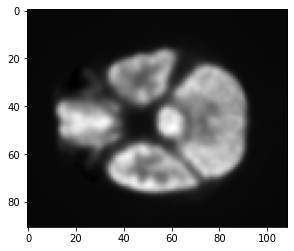

In [66]:
from pyanalyze.classes import *
image_a = AnalyzeImg("D:/Hoffman/AnalyzeImages/reslice_1_Aberdeen_03.hdr")
image_a.ShowSlice(22)
print(image_a.activity)
print(image_a.shape)


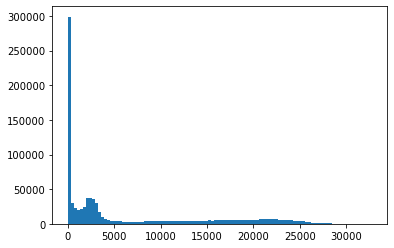

In [68]:
roi,_,_,_ = LoadImage("D:/Hoffman/SPMData/SPM_Templates/template_FDG_PET_OSEM_seg.hdr")
# plt.imshow(roi[:,:,20],cmap="gray")
plt.hist(roi.flatten(),bins=100)
plt.show()

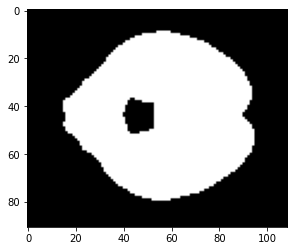

In [69]:
roi,roi_head,_,_ = LoadImage("D:/Hoffman/SPMData/SPM_Templates/template_FDG_PET_OSEM_seg.hdr")
thresh = 10000
roi[roi<thresh] = 0
roi[roi>=thresh] = 1
plt.imshow(roi[:,:,22],cmap="gray")
roi = roi[:,:,:,0]
roi = np.rot90(roi,2)
plt.imshow(roi[:,:,22],cmap="gray")

In [70]:
print(roi_head)

<class 'nibabel.analyze.AnalyzeHeader'> object, endian='<'
sizeof_hdr     : 348
data_type      : b'dsr      '
db_name        : b'mean.hdr         '
extents        : 0
session_error  : 0
regular        : b'r'
hkey_un0       : b'0'
dim            : [  4  91 109  91   1   0   0   0]
vox_units      : b'mm'
cal_units      : b''
unused1        : 0
datatype       : int16
bitpix         : 16
dim_un0        : 0
pixdim         : [0. 2. 2. 2. 0. 0. 0. 0.]
vox_offset     : 0.0
funused1       : 0.83179903
funused2       : 0.0
funused3       : 0.0
cal_max        : 0.0
cal_min        : 0.0
compressed     : 0
verified       : 0
glmax          : 32767
glmin          : 0
descrip        : b'spm - mean image'
aux_file       : b'none                   '
orient         : b''
originator     : b'.\x00@\x00%'
generated      : b''
scannum        : b''
patient_id     : b''
exp_date       : b''
exp_time       : b''
hist_un0       : b''
views          : 0
vols_added     : 0
start_field    : 0
field_skip     : 0
om

In [71]:
print(np.sum(roi)*0.2**3)

2003.0480000000005


In [72]:
def get_roi_mean(an_impath,an_roi):
    imdata,_,_,_ = LoadImage(an_impath)
    return np.mean(np.multiply(an_roi,imdata))

def get_roi_std(an_impath,an_roi):
    imdata,_,_,_ = LoadImage(an_impath)
    return np.std(np.multiply(an_roi,imdata))


for v in ["A","L","S","W"]:
    ROI_path = "D:/Hoffman/SPMData/GN_Templates/ROI_1200_{}1.hdr".format(v)
    ROI,_,_,_ = LoadImage(ROI_path)
    # ROI = np.flip(ROI[:,:,:,0],axis=2)
    ROI = ROI[:,:,:,0]
    print(np.sum(ROI)*0.2**3)
    MasterRefDF["ROI_{}1_Mean".format(v)] = [get_roi_mean("D:/Hoffman/AnalyzeImages/reslice_1_{0}_{1}.hdr".format(row["Centre"],row["SeriesNum"]),ROI) 
                                            if os.path.exists("D:/Hoffman/AnalyzeImages/reslice_1_{0}_{1}.hdr".format(row["Centre"],row["SeriesNum"])) 
                                            else np.nan 
                                            for _,row in MasterRefDF.iterrows()
                                            ]
    
    MasterRefDF["ROI_{}1_SD".format(v)] = [get_roi_std("D:/Hoffman/AnalyzeImages/reslice_1_{0}_{1}.hdr".format(row["Centre"],row["SeriesNum"]),ROI) 
                                            if os.path.exists("D:/Hoffman/AnalyzeImages/reslice_1_{0}_{1}.hdr".format(row["Centre"],row["SeriesNum"])) 
                                            else np.nan 
                                            for _,row in MasterRefDF.iterrows()
                                            ]
    

1200.0000000000002
1199.6560000000002
1198.7360000000003
1200.0000000000002


In [73]:
FILLABLE_VOL = 1200 # ml

MasterRefDF["ExpectedMeanActivityConc"] = MasterRefDF["Activity"]*1000000/FILLABLE_VOL

In [74]:
MasterRefDF.head()

,Centre,SeriesNum,PET/CT,5minPET,Manufacturer,Scanner,Skull,FrameNum,Activity,image_ref_index,...,Pixel Spacing,ROI_A1_Mean,ROI_A1_SD,ROI_L1_Mean,ROI_L1_SD,ROI_S1_Mean,ROI_S1_SD,ROI_W1_Mean,ROI_W1_SD,ExpectedMeanActivityConc
0,Aberdeen,01,P,True,GE,D710,True,1.0,39.753563,3.0,...,"[0.9765625, 0.9765625]",4748.125031,11079.996988,4631.481789,10948.019826,4662.422637,10974.371690,4429.934888,10709.356834,33127.969304
1,Aberdeen,02,P,True,GE,D710,True,2.0,38.517267,3.0,...,"[0.9765625, 0.9765625]",4737.814311,11058.618757,4633.041231,10939.635491,4653.734197,10953.872722,4433.273875,10702.843648,32097.722174
2,Aberdeen,03,P,True,GE,D710,True,3.0,37.319418,3.0,...,"[0.9765625, 0.9765625]",4733.125424,11043.766831,4628.669881,10924.351803,4650.038741,10940.213204,4431.599538,10690.494029,31099.514712
3,Aberdeen,04,P,True,GE,D710,True,4.0,36.158821,3.0,...,"[0.9765625, 0.9765625]",4729.821914,11034.190782,4626.856553,10916.474023,4648.490824,10932.792189,4428.839804,10680.345150,30132.350517
4,Aberdeen,05,P,True,GE,D710,True,5.0,35.034317,3.0,...,"[0.9765625, 0.9765625]",4720.317926,11007.374771,4618.926750,10890.585940,4640.565653,10907.577658,4424.045025,10659.545382,29195.264173


In [76]:
ref_data,ref_hdr,_,_ = LoadImage("D:/Hoffman/AnalyzeImages/reslice_1_Aberdeen_02.hdr")

In [77]:
_,roi_hdr,_,_ = LoadImage("D:/Hoffman/SPMData/GN_Templates/ROI_1200_A1.hdr")
print(roi_hdr)

<class 'nibabel.analyze.AnalyzeHeader'> object, endian='>'
sizeof_hdr     : 348
data_type      : b''
db_name        : b''
extents        : 16384
session_error  : 0
regular        : b'r'
hkey_un0       : b''
dim            : [  4  91 109  91   1   0   0   0]
vox_units      : b'mm'
cal_units      : b''
unused1        : 0
datatype       : float32
bitpix         : 32
dim_un0        : 0
pixdim         : [0. 2. 2. 2. 0. 0. 0. 0.]
vox_offset     : 0.0
funused1       : 1.0
funused2       : 0.0
funused3       : 0.0
cal_max        : 0.0
cal_min        : 0.0
compressed     : 0
verified       : 0
glmax          : 0
glmin          : 0
descrip        : b''
aux_file       : b''
orient         : b''
originator     : b''
generated      : b''
scannum        : b''
patient_id     : b''
exp_date       : b''
exp_time       : b''
hist_un0       : b''
views          : 0
vols_added     : 0
start_field    : 0
field_skip     : 0
omax           : 0
omin           : 0
smax           : 0
smin           : 0


In [78]:
def Get_GE_ImageReconParams(dfrow):
    centre = dfrow["Centre"]
    dcmpath = dfrow["DCM_path"]
    if centre == "Aberdeen":
        if "/ARI_PARAMS/" in dcmpath:
            return 

In [79]:
def get_iterations_subsets(dcm_file):
    if not os.path.isdir(dcm_file) or not os.path.isfile(os.path.join(dcm_file,os.listdir(dcm_file)[0])):
        return np.nan,np.nan
    else:
        dcm_file = os.path.join(dcm_file,os.listdir(dcm_file)[0])
    hdr = dcm.dcmread(dcm_file)
    if not hasattr(hdr,"Manufacturer"):
        return np.nan,np.nan
    else:
        manufacturer = hdr.Manufacturer
        if manufacturer == "GE MEDICAL SYSTEMS":
            if any([x in hdr for x in [(0x000910b2),(0x000910b3)]]):
                return int(hdr[(0x000910b2)].value),int(hdr[(0x000910b3)].value)
            else:
                return np.nan,np.nan
        elif manufacturer == "SIEMENS":
            if (0x0054,0x1103) not in hdr:
                return np.nan,np.nan
            else:
                info = hdr[0x0054,0x1103].value.split(" ")[-1]
                return int(info.split("i")[0]),int(info.split("i")[1].strip("s"))
        elif manufacturer == "Philips Medical Systems":
            return 3,33
        
def BoolRandomsOn(dcm_file):
    try:
        if os.path.isdir(dcm_file):
            dcm_file = os.path.join(dcm_file,os.listdir(dcm_file)[0])
        else:
            return False
        if os.path.isdir(dcm_file):
            return False
        hdr = dcm.dcmread(dcm_file)
        if (0x0054,0x1100) not in hdr:
            return False
        else:
            manufacturer = hdr.Manufacturer
            if manufacturer == "GE MEDICAL SYSTEMS":
                if hdr[0x0054,0x1100].value == "SING":
                    return True
                elif hdr[0x0054,0x1100].value == "DLYD":
                    return True
                else:
                    return False
            elif manufacturer == "SIEMENS":
                if hdr[0x0054,0x1100].value == "DLYD":
                    return True
                else:
                    return False
            elif manufacturer == "Philips Medical Systems":
                if hdr[0x0054,0x1100].value == "DLYD":
                    return True
                else:
                    return False
    except:
        return False
        
def BoolScatterOn(dcm_file):
    try:
        if os.path.isdir(dcm_file):
            dcm_file = os.path.join(dcm_file,os.listdir(dcm_file)[0])
        else:
            return False
        if os.path.isdir(dcm_file):
            return False
        hdr = dcm.dcmread(dcm_file)
        if (0x0054,0x1105) not in hdr:
            return False
        else:
            if hdr[0x0054,0x1105].value != "NONE":
                return True
            else:
                return False
    except:
        return False
    
def BoolAttenuationOn(dcm_file):
    try:
        if os.path.isdir(dcm_file):
            dcm_file = os.path.join(dcm_file,os.listdir(dcm_file)[0])
        else:
            return False
        if os.path.isdir(dcm_file):
            return False
        hdr = dcm.dcmread(dcm_file)
        if (0x0054,0x1101) not in hdr:
            return False
        else:
            if hdr[0x0054,0x1101].value != "NONE":
                return True
            else:
                return False
    except:
        return False

In [80]:
dcm.__version__

'2.2.2'

In [81]:
MasterRefDF["Iterations"] = [get_iterations_subsets(row["DCM_path"])[0] for _,row in MasterRefDF.iterrows()]
MasterRefDF["Subsets"] = [get_iterations_subsets(row["DCM_path"])[1] for _,row in MasterRefDF.iterrows()]
MasterRefDF["ScatterCorrection"] = [BoolScatterOn(row["DCM_path"]) for _,row in MasterRefDF.iterrows()]
MasterRefDF["AttenuationCorrection"] = [BoolAttenuationOn(row["DCM_path"]) for _,row in MasterRefDF.iterrows()]
MasterRefDF["RandomCorrection"] = [BoolRandomsOn(row["DCM_path"]) for _,row in MasterRefDF.iterrows()]

# MasterRefDF["Iterations"],MasterRefDF["Subsets"] = zip(*MasterRefDF["DCM_path"].apply(get_iterations_subsets))

In [82]:
# CREATE SOME AVERAGE IMAGES
# Create some lists of centres and series numbers

# FIRST BATCH: D690 scanners, with skull
d690_skull = MasterRefDF.loc[(MasterRefDF["Scanner"]=="D690") & (MasterRefDF["Skull"]==True) & (MasterRefDF["5minPET"]==True)]

# SECOND BATCH: D690 scanners, without skull
d690_noskull = MasterRefDF.loc[(MasterRefDF["Scanner"]=="D690") & (MasterRefDF["Skull"]==False) & (MasterRefDF["5minPET"]==True)]

# THIRD BATCH: D710 scanners, with skull
d710_skull = MasterRefDF.loc[(MasterRefDF["Scanner"]=="D710") & (MasterRefDF["Skull"]==True) & (MasterRefDF["5minPET"]==True)]

# FOURTH BATCH: D710 scanners, without skull
d710_noskull = MasterRefDF.loc[(MasterRefDF["Scanner"]=="D710") & (MasterRefDF["Skull"]==False) & (MasterRefDF["5minPET"]==True)]

# FIFTH BATCH: mCT scanners, without skull
mct_noskull = MasterRefDF.loc[(MasterRefDF["Scanner"]=="mCT") & (MasterRefDF["Skull"]==False) & (MasterRefDF["5minPET"]==True)]

# SIXTH BATCH: mCT scanners, with skull
mct_skull = MasterRefDF.loc[(MasterRefDF["Scanner"]=="mCT") & (MasterRefDF["Skull"]==True) & (MasterRefDF["5minPET"]==True)]

In [83]:
mct_noskull

,Centre,SeriesNum,PET/CT,5minPET,Manufacturer,Scanner,Skull,FrameNum,Activity,image_ref_index,...,ROI_S1_Mean,ROI_S1_SD,ROI_W1_Mean,ROI_W1_SD,ExpectedMeanActivityConc,Iterations,Subsets,ScatterCorrection,AttenuationCorrection,RandomCorrection
174,Dundee,07,P,True,SIEMENS,mCT,False,1.0,42.793829,78.0,...,1987.470102,4454.741654,1988.853648,4455.024975,35661.524156,3.0,24.0,True,True,True
176,Dundee,09,P,True,SIEMENS,mCT,False,2.0,41.462983,80.0,...,2104.560625,4717.187549,2106.026454,4717.490542,34552.485972,3.0,24.0,True,True,True
178,Dundee,11,P,True,SIEMENS,mCT,False,3.0,40.173525,82.0,...,2130.906823,4776.253498,2132.315311,4776.388458,33477.937780,3.0,24.0,True,True,True
180,Dundee,13,P,True,SIEMENS,mCT,False,4.0,38.924168,84.0,...,1998.845991,4480.245643,2000.413672,4480.923158,32436.806976,3.0,24.0,True,True,True
182,Dundee,15,P,True,SIEMENS,mCT,False,5.0,37.713665,86.0,...,1905.707768,4271.499724,1906.777957,4271.197363,31428.054312,3.0,24.0,True,True,True
185,Dundee,18,P,True,SIEMENS,mCT,False,6.0,36.540807,89.0,...,2112.070006,4734.008183,2113.749527,4734.779670,30450.672859,3.0,24.0,True,True,True
186,Dundee,19,P,True,SIEMENS,mCT,False,1.0,42.793829,90.0,...,1584.236238,3550.950656,1585.561905,3551.672336,35661.524156,4.0,21.0,True,True,True
187,Dundee,20,P,True,SIEMENS,mCT,False,2.0,41.462983,91.0,...,1788.484107,4008.743072,1789.536821,4008.569519,34552.485972,4.0,21.0,True,True,True
188,Dundee,21,P,True,SIEMENS,mCT,False,3.0,40.173525,92.0,...,1922.411202,4308.962230,1923.686012,4309.088606,33477.937780,4.0,21.0,True,True,True
189,Dundee,22,P,True,SIEMENS,mCT,False,4.0,38.924168,93.0,...,1715.158139,3844.422448,1716.524609,3845.046194,32436.806976,4.0,21.0,True,True,True


In [84]:
MasterRefDF.loc[MasterRefDF["Manufacturer"]=="GE"]

,Centre,SeriesNum,PET/CT,5minPET,Manufacturer,Scanner,Skull,FrameNum,Activity,image_ref_index,...,ROI_S1_Mean,ROI_S1_SD,ROI_W1_Mean,ROI_W1_SD,ExpectedMeanActivityConc,Iterations,Subsets,ScatterCorrection,AttenuationCorrection,RandomCorrection
0,Aberdeen,01,P,True,GE,D710,True,1.0,39.753563,3.0,...,4662.422637,10974.371690,4429.934888,10709.356834,33127.969304,NaN,NaN,True,True,True
1,Aberdeen,02,P,True,GE,D710,True,2.0,38.517267,3.0,...,4653.734197,10953.872722,4433.273875,10702.843648,32097.722174,NaN,NaN,True,True,True
2,Aberdeen,03,P,True,GE,D710,True,3.0,37.319418,3.0,...,4650.038741,10940.213204,4431.599538,10690.494029,31099.514712,NaN,NaN,True,True,True
3,Aberdeen,04,P,True,GE,D710,True,4.0,36.158821,3.0,...,4648.490824,10932.792189,4428.839804,10680.345150,30132.350517,NaN,NaN,True,True,True
4,Aberdeen,05,P,True,GE,D710,True,5.0,35.034317,3.0,...,4640.565653,10907.577658,4424.045025,10659.545382,29195.264173,NaN,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,UCL-UCLH,24,P,True,GE,DVCT,True,3.0,NaN,190.0,...,4280.398091,9964.895974,3956.823497,9554.472892,NaN,3.0,20.0,True,True,True
478,UCL-UCLH,25,P,True,GE,DVCT,True,4.0,NaN,190.0,...,4278.099585,9958.891812,3955.379540,9551.045214,NaN,3.0,20.0,True,True,True
479,UCL-UCLH,26,P,True,GE,DVCT,True,5.0,NaN,190.0,...,4278.620277,9958.971102,3956.686764,9552.348900,NaN,3.0,20.0,True,True,True
480,UCL-UCLH,27,P,True,GE,DVCT,True,6.0,NaN,190.0,...,4287.096063,9981.079055,3962.865242,9572.079672,NaN,3.0,20.0,True,True,True


In [85]:
import seaborn as sns
sns.set()

In [86]:
MasterRefDF = MasterRefDF.loc[MasterRefDF["5minPET"]==True]

In [87]:
def writeString(random,scatter,attenuation):
    if random == True:
        if scatter == True:
            if attenuation == True:
                return "Randoms + Scatter + Attenuation"
            else:
                return "Randoms + Scatter"
        else:
            if attenuation == True:
                return "Randoms + Attenuation"
            else:
                return "Randoms"
    else:
        if scatter == True:
            if attenuation == True:
                return "Scatter + Attenuation"
            else:
                return "Scatter"
        else:
            if attenuation == True:
                return "Attenuation"
            else:
                return "None"
MasterRefDF["Corrections"] = [writeString(row["RandomCorrection"],row["ScatterCorrection"],row["AttenuationCorrection"]) for _,row in MasterRefDF.iterrows()]

In [88]:
MasterRefDF["Corrections"].value_counts()

Randoms + Scatter + Attenuation    382
None                                18
Randoms                             12
Name: Corrections, dtype: int64

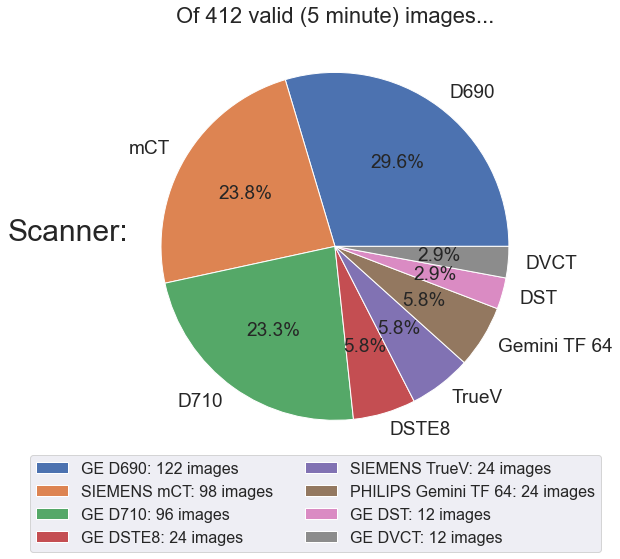

In [89]:
MasterRefDF["Scanner"].value_counts().plot.pie(y="Scanner",figsize=(8,8),autopct='%1.1f%%',fontsize=19,title="of {} images: ".format(len(MasterRefDF)),legend=True)
plt.ylabel("Scanner:",fontsize=30,rotation=0,labelpad=50)
plt.title("Of {} valid (5 minute) images...".format(len(MasterRefDF)),fontsize=22)
labels = ["{} {}: {} images".format(MasterRefDF[MasterRefDF["Scanner"] == i].Manufacturer.values[0],i,j) for i,j in zip(MasterRefDF["Scanner"].value_counts().index,MasterRefDF["Scanner"].value_counts().values)]
plt.legend(labels=labels,loc="lower left",ncol=2,borderaxespad=-5.5,fontsize=16)
plt.show()

In [90]:
MasterRefDF["Reconstruction"] = ["{}i{}s".format(str(i).replace(".0",""),str(j).replace(".0","")) for i,j in zip(MasterRefDF["Iterations"],MasterRefDF["Subsets"])]
MasterRefDF[MasterRefDF["Manufacturer"]=="GE"]["Reconstruction"].value_counts()
MasterRefDF["ImageUpdates"] = MasterRefDF["Iterations"]*MasterRefDF["Subsets"]
MasterRefDF["Reconstruction"].replace({"naninans": "N/A"}, inplace=True)
MasterRefDF["Reconstruction"].value_counts()

3i18s    143
3i24s     53
N/A       30
2i24s     30
3i20s     24
5i21s     24
3i33s     24
3i21s     24
4i18s     18
4i21s     18
2i20s     12
6i24s     12
Name: Reconstruction, dtype: int64

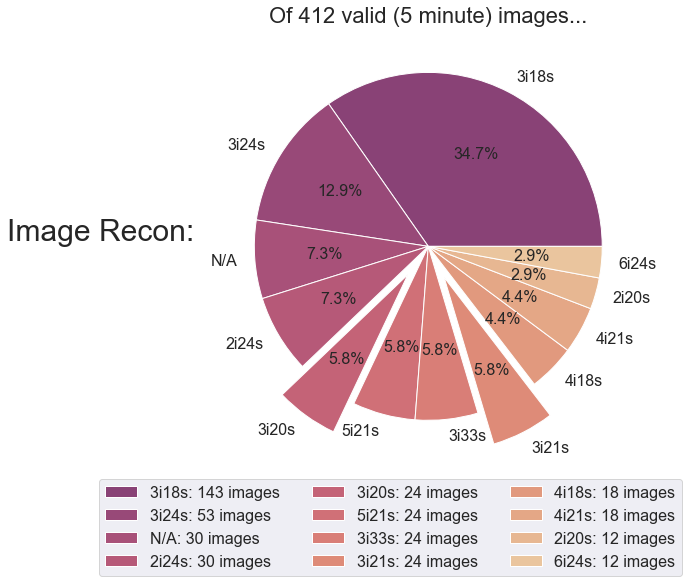

In [91]:
MasterRefDF["Reconstruction"].value_counts().plot.pie(y="Reconstruction",figsize=(8,8),autopct='%1.1f%%',fontsize=16,title="of {} images: ".format(len(MasterRefDF)),colors=sns.color_palette("magma",24,desat=0.65)[10:-1],explode=[0.2 if any(i in j for i in ["3i20s","3i21s"]) else 0 for j in MasterRefDF["Reconstruction"].value_counts().index])
plt.ylabel("Image Recon:",fontsize=30,rotation=0,labelpad=110)
plt.title("Of {} valid (5 minute) images...".format(len(MasterRefDF)),fontsize=22)
labels = ["{}: {} images".format(i,j) for i,j in zip(MasterRefDF["Reconstruction"].value_counts().index,MasterRefDF["Reconstruction"].value_counts().values)]
plt.legend(labels=labels,loc="lower left",ncol=3,borderaxespad=-7,fontsize=16)
plt.show()

In [92]:
def GetMatrixSize(dcm_file):
    if not os.path.isdir(dcm_file) or not os.path.isfile(os.path.join(dcm_file,os.listdir(dcm_file)[0])):
        return "N/A"
    else:
        dcm_file = os.path.join(dcm_file,os.listdir(dcm_file)[0])
    hdr = dcm.dcmread(dcm_file)
    if all(hasattr(hdr,x) for x in ["Rows","Columns","NumberOfSlices"]):
        return "{}x{}x{}".format(hdr.Rows,hdr.Columns,hdr.NumberOfSlices)
    else:
        return "N/A"


In [93]:
MasterRefDF["MatrixSize"] = [GetMatrixSize(row["DCM_path"]) for _,row in MasterRefDF.iterrows()]

<AxesSubplot:title={'center':'of 412 images: '}, ylabel='MatrixSize'>

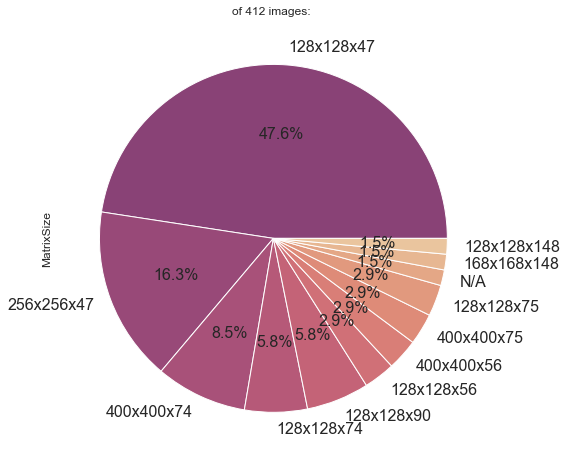

In [94]:
MasterRefDF["MatrixSize"].value_counts().plot.pie(y="MatrixSize",figsize=(8,8),autopct='%1.1f%%',fontsize=16,title="of {} images: ".format(len(MasterRefDF)),colors=sns.color_palette("magma",24,desat=0.65)[10:-1],explode=[0.2 if any(i in j for i in ["128x128x128","128x128x64"]) else 0 for j in MasterRefDF["MatrixSize"].value_counts().index])

In [95]:
MasterRefDF.columns

Index(['Centre', 'SeriesNum', 'PET/CT', '5minPET', 'Manufacturer', 'Scanner',
       'Skull', 'FrameNum', 'Activity', 'image_ref_index', 'DCM_path',
       'Slice Thickness', 'Rows', 'Columns', 'Number of Slices',
       'Pixel Spacing', 'ROI_A1_Mean', 'ROI_A1_SD', 'ROI_L1_Mean', 'ROI_L1_SD',
       'ROI_S1_Mean', 'ROI_S1_SD', 'ROI_W1_Mean', 'ROI_W1_SD',
       'ExpectedMeanActivityConc', 'Iterations', 'Subsets',
       'ScatterCorrection', 'AttenuationCorrection', 'RandomCorrection',
       'Corrections', 'Reconstruction', 'ImageUpdates', 'MatrixSize'],
      dtype='object')

In [96]:
MasterRefDF["VoxelSize"] = [row["Slice Thickness"]*np.prod(row["Pixel Spacing"]) for _,row in MasterRefDF.iterrows()]

<AxesSubplot:title={'center':'of 412 images: '}, ylabel='VoxelSize'>

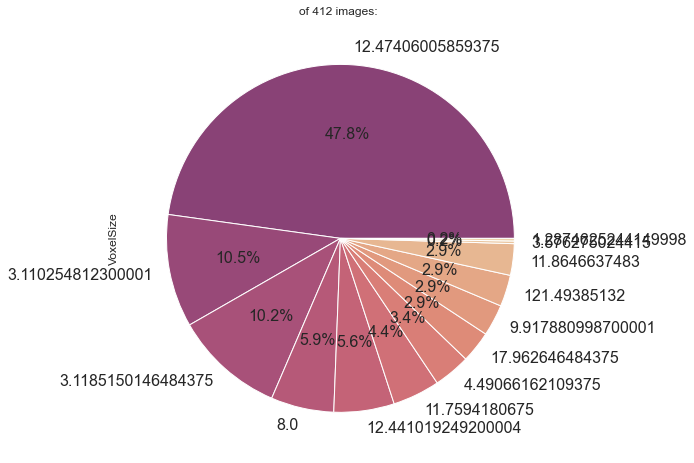

In [97]:
MasterRefDF["VoxelSize"].value_counts().plot.pie(figsize=(8,8),fontsize=16,title="of {} images: ".format(len(MasterRefDF)),colors=sns.color_palette("magma",24,desat=0.65)[10:-1],autopct='%1.1f%%')
# plt.xticks(["{:.2f}".format(i) for i in MasterRefDF["VoxelSize"].value_counts().sort_index().index],
#                 ["{:.2f}".format(i) for i in MasterRefDF["VoxelSize"].value_counts().sort_index().index],rotation=0)

In [98]:
gdf = MasterRefDF.groupby(["Manufacturer","Scanner","Skull","Corrections","Reconstruction","MatrixSize","VoxelSize"]).size().reset_index(name="Counts")

In [99]:
gdf.tail()

,Manufacturer,Scanner,Skull,Corrections,Reconstruction,MatrixSize,VoxelSize,Counts
41,SIEMENS,mCT,True,Randoms + Scatter + Attenuation,3i24s,128x128x74,11.864664,6
42,SIEMENS,mCT,True,Randoms + Scatter + Attenuation,3i24s,128x128x75,121.493851,6
43,SIEMENS,mCT,True,Randoms + Scatter + Attenuation,3i24s,400x400x74,12.441019,5
44,SIEMENS,mCT,True,Randoms + Scatter + Attenuation,4i21s,400x400x56,3.110255,6
45,SIEMENS,mCT,True,Randoms + Scatter + Attenuation,5i21s,400x400x74,3.110255,12


In [101]:
# gdf.plot.pie(y="Counts",figsize=(8,8))